In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import datetime

def obtener_tiempo(dfr):
    #Esta funcion permite obtener una columna Datetime a partir del agno, dia, hora y minuto de los datos iniciales
    dfr['Day'] = pd.to_datetime(dfr['Day'], format='%j').dt.strftime('%m-%d')
    dfr['Hour'] = dfr['Hour'].astype(str).str.zfill(2)
    dfr['Datetime'] = pd.to_datetime(dfr[['Year','Day', 'Hour', 'Minute']]
                   .astype(str).apply(' '.join, 1), format='%Y %m-%d %H %M') 
    return dfr

def sustituir(dfr):
    #Sustitucion de los valores 9999... por NaN (sabemos que la fila 2 son todo valores nulos para cada variable)
    valores_null = dfr.iloc[2, 4:]
    for i in range(len(valores_null)):
        dfr.iloc[:,i+4] = dfr.iloc[:,i+4].replace(valores_null[i], np.nan)
    return dfr

def imputar_por_interpolacion(dfr):
    #Sustituye los valores NaN por valores aproximados mediante el metodo de interpolacion
    dfr = dfr.interpolate(method='linear', limit_direction='forward')
    return dfr

def imputar_por_KNND(dfr):
    #Este metodo es para imputar las filas que no se hayan podido imputar con interpolacion (primera fila)
    imputer = KNNImputer(n_neighbors=3, weights = 'distance')
    dfr[:] = imputer.fit_transform(dfr)
    return dfr

def normalizar_datos(dfr):
    #Dado un DataFrame, devuelve el DataFrame con valores normalizados
    x = dfr.values #returns a numpy array
    standard_scaler = preprocessing.StandardScaler()
    dfr[:] = standard_scaler.fit_transform(x)
    #dfr = pd.DataFrame(x_scaled)
    return dfr

def desnormalizar_datos(dfr):
    #Dado un DataFrame, devuelve el DataFrame con valores desnormalizados
    x = dfr.values
    standard_scaler = preprocessing.StandardScaler()
    dfr[:] = standard_scaler.inverse_transform(x)
    return dfr

def eliminar_gaps(dfr, n):
    #Eliminacion de filas donde alguna columna tiene N NaNs consecutivos
    for columna in range(dfr.shape[1]):
        mask = dfr.iloc[:,columna].notna()
        a = mask.ne(mask.shift()).cumsum()
        dfr = dfr[(a.groupby(a).transform('size') < n) | mask]
    return dfr

def NaN_consecutivos(dfr):
    #Obtencion del numero maximo de NaN consecutivos segun columna
    nans_consecutivos = []
    for columna in range(df.shape[1]):
        nan_columna = max(df.iloc[:,columna].isnull().astype(int).groupby(df.iloc[:,columna].notnull().astype(int).cumsum()).sum())
        nans_consecutivos.append(nan_columna)

    df_nans = pd.DataFrame(columns = ['Variable','Numero de nans consecutivos'])
    df_nans.iloc[:,0] = df.columns
    df_nans.iloc[:,1] = nans_consecutivos
    return df_nans

#1-Montamos Drive para poder acceder a los datos y los leemos

In [2]:
#Leemos los datos
#df = pd.read_csv('datos.csv', header=0)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/TFG_codigo/Prediccion_general/datos.csv', header=0)

#2-Preprocesamos los datos y los normalizamos

In [4]:
df = sustituir(df)
df = imputar_por_interpolacion(df)
imputar_por_KNND(df.iloc[:3, :])
df = obtener_tiempo(df)
df = df.drop(['Year', 'Day', 'Hour', 'Minute'], axis = 1)
df = df.set_index('Datetime')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,,,
1995-01-01 00:00:00,1.37,0.130,1.17,-0.670,311.453358,18.422649,17401.558702
1995-01-01 00:05:00,1.26,0.090,1.12,-0.500,311.400000,18.460000,17347.000000
1995-01-01 00:10:00,1.46,0.037,1.30,-0.586,311.560000,18.348000,17510.600000
1995-01-01 00:15:00,1.66,-0.016,1.48,-0.672,311.720000,18.236000,17674.200000
1995-01-01 00:20:00,1.86,-0.069,1.66,-0.758,311.880000,18.124000,17837.800000
...,...,...,...,...,...,...,...
2021-02-18 23:35:00,2.87,2.130,0.03,-1.860,364.100000,4.670000,58514.000000
2021-02-18 23:40:00,2.92,2.210,0.07,-1.880,364.900000,4.400000,62883.000000
2021-02-18 23:45:00,2.90,2.450,0.05,-1.540,364.100000,4.650000,58624.000000


In [6]:
from sklearn.preprocessing import StandardScaler
x = df.values #returns a numpy array
scaler = StandardScaler()
scaler.fit(x)
df[:] = scaler.transform(x)

In [5]:
columnas = [0,3,4,5,6]
df_target = df.iloc[:, columnas]
from sklearn.preprocessing import StandardScaler
x = df_target.values #returns a numpy array
scaler = StandardScaler()
scaler.fit(x)
df_target[:] = scaler.transform(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3051: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(key, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3036: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [10]:
df_target = df_target.loc['20180822':'201809032359']

In [11]:
df_target

,IMF(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,
2018-08-22 00:00:00,-1.602239,0.025585,1.149144,-0.311961,0.775502
2018-08-22 00:05:00,-1.401293,-0.192675,1.157116,-0.313921,0.715325
2018-08-22 00:10:00,-1.167406,-0.359402,1.095333,-0.321760,0.370105
2018-08-22 00:15:00,-1.065286,-0.501878,1.040526,-0.296283,0.304477
2018-08-22 00:20:00,-1.035638,-0.623134,1.030562,-0.304122,0.231601
...,...,...,...,...,...
2018-09-03 23:35:00,-0.880811,0.762216,-0.921560,1.610573,-0.735968
2018-09-03 23:40:00,-0.805045,0.795561,-0.898640,1.641930,-0.754710
2018-09-03 23:45:00,-0.716102,0.795561,-0.846823,2.490510,-0.684374


**FECHAS TORMENTAS GEOMAGNETICAS**

In [ ]:
#ORIGINAL
TRAINING_STORMS_DATES_START = ['19980214', '19980802', '19980919', '19990216', '19991015', '20000709', '20000806', '20000915', '20001101',
                               '20010314', '20010406', '20011017', '20011031', '20020517', '20031115', '20040720', '20050510', '20060409', '20061209', '20120301']
TRAINING_STORMS_DATES_END = ['199802222359', '199808082359', '199809292359', '199902242359', '199910252359', '200007192359', '200008162359', '200009252359', '200011152359',
                             '200103242359', '200104162359', '200110222359', '200111102359', '200205272359', '200311252359', '200407302359', '200505202359', '200604192359', '200612192359', '201203112359']

VALIDATION_STORMS_DATES_START = [
    '19980428', '19990919', '20031025', '20150618', '20170901']
VALIDATION_STORMS_DATES_END = [
    '199805082359', '199909262359', '200311032359', '201506282359', '201709112359']

TESTING_STORMS_DATES_START = ['19980622', '19981102', '19990109', '19990413', '20000116', '20000402', '20000519',
                              '20010326', '20030526', '20030708', '20040118', '20041104', '20120910', '20130528', '20130626', '20150311', '20180822']
TESTING_STORMS_DATES_END = ['199806302359', '199811122359', '199901182359', '199904192359', '200001262359', '200004122359', '200005282359', '200104042359',
                            '200306062359', '200307182359', '200401272359', '200411142359', '201210052359', '201306042359', '201307042359', '201503212359', '201809032359']

Sacamos datos de una tormenta en concreto la ultima de test

In [9]:
df_tormenta = df.loc['20180822':'201809032359']
df_tormenta.head(5)

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,,,
2018-08-22 00:00:00,-1.602239,-0.110571,0.022872,0.025585,1.149144,-0.311961,0.775502
2018-08-22 00:05:00,-1.401293,-0.138661,0.174991,-0.192675,1.157116,-0.313921,0.715325
2018-08-22 00:10:00,-1.167406,-0.397088,0.248515,-0.359402,1.095333,-0.321760,0.370105
2018-08-22 00:15:00,-1.065286,-0.427987,0.215556,-0.501878,1.040526,-0.296283,0.304477
2018-08-22 00:20:00,-1.035638,-0.239785,0.263726,-0.623134,1.030562,-0.304122,0.231601


In [ ]:
df_tormenta

In [7]:
df_tormenta.shape[0]

3744

#3-Creacion de datasets

In [7]:
#===================================Parametros para obtener train_dataset y val_dataset====================================
STEP          = 1
past_history  = 40
future_target = 4



def multivariate_multioutput_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data)[:,:,:,np.newaxis,np.newaxis], np.array(labels)[:,:,:,np.newaxis,np.newaxis]



In [8]:
def multivariate_multioutput_data_salida_agrupada(dataset, target, start_index, end_index, history_size,
                                                  target_size, step, single_step=False, agrupacion_salida=3):
  
    data = []
    labels = []
    start_index = start_index + history_size                                            #40


    if end_index is None:
        end_index = len(dataset) - target_size * agrupacion_salida

    for i in range(start_index, end_index):                                              #i empieza en 40
        indices = range(i-history_size, i, step)                                         #Indices = 0, 40, 1 pero range no coge el 40, por eso son del 0 al 39
        data.append(dataset[indices])                              

        aux_labels = []
        for timestep in range(1, target_size+1):
            aux_labels.append(target[(i-1) + timestep*agrupacion_salida])                #Aqui estariamos cogiendo el 40 + 1 *3 = 43, y queremos el 42 por lo que hay que restar 1

        labels.append(aux_labels)

    return np.array(data)[:,:,:,np.newaxis,np.newaxis], np.array(labels)[:,:,:,np.newaxis,np.newaxis]

In [10]:
#Creacion de datasets de entrenamiento y validacion
dataset = df_tormenta.values

x_test, y_test = multivariate_multioutput_data(dataset, dataset, 0,
                                                 None, 40,
                                                 4, 1)

In [12]:
dataset = df_target.values
x_test, y_test = multivariate_multioutput_data_salida_agrupada(dataset, dataset, 0,
                                                 None, past_history,
                                                 future_target, STEP)

In [13]:
x_test.shape, y_test.shape

((3692, 40, 5, 1, 1), (3692, 4, 5, 1, 1))

#4-Creacion de modelos

**MODELO BASELINE**

In [ ]:
def baseline(x_val, y_val):
  num_predicciones = len(y_val)
  timesteps_futuros = len(y_val[0])
  timesteps_pasados = len(x_val[0])
  variables = len(x_val[0][0])
  predicciones = np.zeros(shape=(y_val.shape))
  for prediccion in range(num_predicciones):
      dato = x_val[prediccion][timesteps_pasados-1]
      for num_timesteps_a_predecir in range(timesteps_futuros):
          predicciones[prediccion][num_timesteps_a_predecir] = dato
  return predicciones

**MODELO COMPLEJO**

In [14]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
def build_model_complejo(input_timesteps, output_timesteps, num_links, num_inputs):    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = True))
    
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = False))
    
    model.add(Dropout(0.20, name = 'dropout_2'))
    model.add(BatchNormalization(name = 'batch_norm_2'))
    
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))
    
    model.add(ConvLSTM2D(name ='conv_lstm_3',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(Dropout(0.20, name = 'dropout_3'))
    model.add(BatchNormalization(name = 'batch_norm_3'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2', activation = 'linear'))
    
    optimizer = tf.keras.optimizers.RMSprop(lr=0.004, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

**CARGAMOS EL MODELO COMPLEJO A 20 MINUTOS**

In [ ]:
modelo_c = build_model_complejo(40, 4, 7, 7)
modelo_c.load_weights('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/modelo_complejo_150epochs_pesos.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**CARGAMOS EL MODELO COMPLEJO A 60 MINUTOS**

In [15]:
modelo_c = build_model_complejo(40, 4, 5, 5)
modelo_c.load_weights('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelos_60min/Modelo_C/modelo_complejo_150epochs_pesos.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Realizamos predicciones a 20 min

In [ ]:
predicciones_tormenta_c = modelo_c.predict(x_test, verbose=1)
predicciones_baseline_tormenta = baseline(x_test, y_test)

13/13 [==============================] - 1s 94ms/step


Realizamos predicciones a 60 min

In [16]:
predicciones_tormenta_c = modelo_c.predict(x_test, verbose=1)

116/116 [==============================] - 13s 96ms/step


Guardamos las predicciones a 20 min

In [ ]:
np.save('/content/drive/MyDrive/Prediccion_Tormenta/modelo_complejo_predicciones_tormenta2018', predicciones_tormenta_c)
np.save('/content/drive/MyDrive/Prediccion_Tormenta/predicciones_baseline_tormenta2018', predicciones_baseline_tormenta)

Cargamos las predicciones a 20 min

In [ ]:
predicciones_tormenta_c = np.load('/content/drive/MyDrive/Prediccion_Tormenta/modelo_complejo_predicciones_tormenta2018.npy')
predicciones_baseline_tormenta = np.load('/content/drive/MyDrive/Prediccion_Tormenta/predicciones_baseline_tormenta2018.npy')

Guardamos predicciones a 60 min

In [22]:
np.save('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelos_60min/Modelo_C/Prediccion_tormenta2018/modelo_complejo60_predicciones_tormenta2018', predicciones_tormenta_c)

#6-Evaluación del modelo

Generamos la estructura para que con las funciones podamos obtener las métricas de cada modelo para compararlos

In [ ]:
predicciones = [predicciones_tormenta_c, predicciones_baseline_tormenta]
nombre_modelos = ['Complejo', 'Baseline']
variables = df_tormenta.columns

In [17]:
predicciones = [predicciones_tormenta_c]
nombre_modelos = ['Complejo60']
variables = df_target.columns

**Generamos las comparativas entre los modelos**

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def obtener_metricas(y_val, y_preds, nombre_modelos):
    #Aplanamos los datos para que se puedan calcular las metricas
    y_val = np.squeeze(y_val)
    y_val = y_val.ravel()
    datos_mse  = []
    datos_r2   = []
    datos_rmse = []
    datos_mae  = []
    columnas   = []
    for modelo in range(len(nombre_modelos)):
        y_pred = np.squeeze(y_preds[modelo])
        y_pred = y_pred.ravel()
        #Calculamos las metricas
        r2   = r2_score(y_val, y_pred)
        mse  = mean_squared_error(y_val, y_pred)
        mae  = mean_absolute_error(y_val, y_pred)
        rmse = mse**0.5
        #Los anadimos a las listas correspondientes
        datos_mse.append(mse)
        datos_r2.append(r2)
        datos_rmse.append(rmse)
        datos_mae.append(mae)
        #Creamos una columna por modelo
        columnas.append(nombre_modelos[modelo])

    #Mostramos los resultados en forma de df
    nombres_metricas = ['R2', 'RMSE', 'MSE', 'MAE']
    valores = [datos_r2, datos_rmse, datos_mse, datos_mae]

    metricas = pd.DataFrame(valores, columns = columnas, index = nombres_metricas)
    return metricas



def desglose_por_timestep(y_val, predicciones):
    num_predicciones = predicciones.shape[0]
    num_timesteps   = predicciones.shape[1]

    timesteps_y_val  = []
    timesteps_y_pred = []
    
    #Creamos 4 listas, una para cada timestep
    for lista_timestep in range(num_timesteps):
        timestep_valN = []
        timesteps_y_val.append(timestep_valN)
        timestep_predN = []
        timesteps_y_pred.append(timestep_predN)
    #Metemos en cada una de los 4 listas, el correspondiente timestep de cada prediccion
    for prediccion in range(num_predicciones):
        for timestep in range(num_timesteps):
            timesteps_y_pred[timestep].append(predicciones[prediccion][timestep])
            timesteps_y_val[timestep].append(y_val[prediccion][timestep])
    
    return timesteps_y_val, timesteps_y_pred

def comparacion_modelos_timestep(y_val, predicciones, nombre_modelos):
  timesteps_y_preds = []
  for modelo in range(len(nombre_modelos)):
      timesteps_y_val, timesteps_y_pred_modelo = desglose_por_timestep(y_val, predicciones[modelo])
      timesteps_y_preds.append(timesteps_y_pred_modelo)
  for timestep in range(4):
      timesteps_modelos = []
      for modelo in range(len(nombre_modelos)):
          timesteps_modelos.append(timesteps_y_preds[modelo][timestep])
      print("=========TIMESTEP: ",timestep,"=========\n",obtener_metricas(timesteps_y_val[timestep], timesteps_modelos, nombre_modelos))


def comparacion_modelos_timestep_variables(y_val, predicciones, nombre_modelos, nombre_variables):
  desglose_preds = []
  for modelo in range(len(nombre_modelos)):
      desglose_val, desglose_pred = agrupar_variables_timestep(y_val, predicciones[modelo])
      desglose_preds.append(desglose_pred)
  
  for paso in range(4):
    print("===================TIMESTEP ", paso,"===================")
    for variable in range(len(nombre_variables)):
        variableN_modelos = []
        for modelo in range(len(nombre_modelos)):
          variableN_modelos.append(desglose_preds[modelo][paso][variable])
        print("=====VARIABLE", nombre_variables[variable],"====")
        print(obtener_metricas(desglose_val[paso][variable], variableN_modelos, nombre_modelos))


def agrupar_variables_timestep(y_val, y_pred):
    num_predicciones = y_val.shape[0]
    num_timesteps    = y_val.shape[1]
    num_variables    = y_val.shape[2]
    #Creacion de listas
    desglose_val  = []
    desglose_pred = []
    for paso in range(num_timesteps):
        timestepN_val  = []
        timestepN_pred = []
        for i in range(num_variables):
            timestepN_varI_val = []
            timestepN_val.append(timestepN_varI_val)
            
            timestepN_varI_pred = []
            timestepN_pred.append(timestepN_varI_pred)
            
        desglose_val.append(timestepN_val)
        desglose_pred.append(timestepN_pred)
    
    #Desglose
    for prediccion in range(num_predicciones):
        for paso in range(num_timesteps):
            for var in range(num_variables):
                desglose_val[paso][var].append(y_val[prediccion][paso][var])
                desglose_pred[paso][var].append(y_pred[prediccion][paso][var])
    
    return desglose_val, desglose_pred




def resumen_comparativa(y_val, predicciones, nombre_modelos, variables):
    pd.set_option("display.max_rows", None, "display.max_columns", None)

    #1-Comparativa general de los modelos
    print("===================================================COMPARATIVA GENERAL DE LOS MODELOS===================================================")
    print(obtener_metricas(y_val, predicciones, nombre_modelos))

    #2-Comparativa por timestep de los modelos
    print("===================================================COMPARATIVA POR TIMESTEP DE LOS MODELOS===================================================")
    print(comparacion_modelos_timestep(y_val, predicciones, nombre_modelos))

    print("===================================================COMPARATIVA POR TIMESTEP Y VARIABLES DE LOS MODELOS===================================================")
    #3-Comparativa por timestep y variable de los modelos
    print(comparacion_modelos_timestep_variables(y_val, predicciones, nombre_modelos, variables))

In [19]:
resumen_comparativa(y_test, predicciones, nombre_modelos, variables)

===================================================COMPARATIVA GENERAL DE LOS MODELOS===================================================
      Complejo60
R2      0.829207
RMSE    0.396559
MSE     0.157259
MAE     0.221445
===================================================COMPARATIVA POR TIMESTEP DE LOS MODELOS===================================================
=========TIMESTEP:  0 =========
       Complejo60
R2      0.883910
RMSE    0.326805
MSE     0.106802
MAE     0.183181
=========TIMESTEP:  1 =========
       Complejo60
R2      0.838743
RMSE    0.385232
MSE     0.148404
MAE     0.214547
=========TIMESTEP:  2 =========
       Complejo60
R2      0.807678
RMSE    0.420822
MSE     0.177092
MAE     0.236368
=========TIMESTEP:  3 =========
       Complejo60
R2      0.786604
RMSE    0.443553
MSE     0.196740
MAE     0.251683
None
===================================================COMPARATIVA POR TIMESTEP Y VARIABLES DE LOS MODELOS===================================================
=====

In [30]:
len(x_test)

3692

**Visualizamos la predicción del modelo complejo**

In [20]:
def obtener_predicciones_variables(predicciones_tormentas, nombre_variables):
  num_predicciones = len(predicciones_tormentas)
  num_pasos        = len(predicciones_tormentas[0])
  num_variables    = len(predicciones_tormentas[0][0])

  lista_variables = []


  for variable in range(num_variables):
    valores_variable = []
    lista_variables.append(valores_variable)

  for predicciones in range(0, num_predicciones, 4):
    for paso in range(num_pasos):
      for variable in range(num_variables):
        #print("prediccion: ", predicciones, "paso: ", paso, "varaible: ", variable)
        dato = np.squeeze(predicciones_tormentas[predicciones][paso][variable])
        lista_variables[variable].append(dato)

  return lista_variables

In [21]:
def obtener_df_predicciones(predicciones_variables, df_tormenta_real):
    df_predicciones = pd.DataFrame(predicciones_variables)
    df_predicciones = df_predicciones.T
    df_predicciones.columns = variables
    df_predicciones.set_index(df_tormenta_real.index, inplace=True)

    df_predicciones[:] = scaler.inverse_transform(predicciones_variables.values)
    df_tormenta_real[:] = scaler.inverse_transform(df_tormenta_real.values)


    nombre_observado = variables+' observado'
    nombre_predicho  = variables+ ' predicho'

    df_predicciones=df_predicciones.astype(float)
    df_tormenta_real=df_tormenta_real.astype(float)

    #Grafico para ver de manera clara donde se encuentran los NaN en cada variable (discontinuidad)
    plt.rcParams.update({'legend.fontsize': 15})
    ax = df_predicciones.plot(subplots = True, figsize=(25, 25), markersize = 20)
    df_tormenta_real.plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = 'grey', sharex = False,
                            fontsize=22, markersize = 20)

In [22]:
predicciones_variables = obtener_predicciones_variables(predicciones_tormenta_c, variables)
len(predicciones_variables), len(predicciones_variables[0])

(5, 3692)

In [ ]:
predicciones_variables

df tormenta a 60 minutos:

In [23]:
def obtener_df_agrupado(df, salto=3, timesteps_pasados=40, timesteps_futuros=4):
  nuevo_df = df.copy()
  for salto in range(40 + timesteps_futuros - 1, df.shape[0], salto):
    pos = int((salto-40)/3)
    nuevo_df.iloc[pos] = df.iloc[salto-1]
    print(pos, (salto-1))
  return nuevo_df

In [23]:
df_target.shape[0]

3744

OBTENER DF OBSERVADO DE 15 EN 15 MIN

In [ ]:
df_tormenta_observado = obtener_df_agrupado(df_target)

In [25]:
df_tormenta_observado = df_tormenta_observado.iloc[1:1235]

In [26]:
df_tormenta_observado.shape

(1234, 5)

In [27]:
df_tormenta_observado = df_tormenta_observado.iloc[:1232]

In [28]:
df_tormenta_observado.shape

(1232, 5)

**OBTENER DF PREDICHO DE 15 EN 15 MIN**

In [29]:
def obtener4x15(predicciones_var):
  datos_agrupados = []

  for variable in range(len(predicciones_var)):
    nueva_lista = []
    datos_agrupados.append(nueva_lista)

  for variable in range(len(predicciones_var)):
    cont = 0
    for prediccion in range( 0, len(predicciones_var[0]), 12):
      for paso_tiempo in range(4):
        print(variable, cont, " - ", variable, prediccion + paso_tiempo)
        datos_agrupados[variable].append(predicciones_var[variable][prediccion + paso_tiempo])
        cont = cont + 1

  return datos_agrupados

In [30]:
len(predicciones_variables), len(predicciones_variables[0])

(5, 3692)

In [ ]:
datos_predichos = obtener4x15(predicciones_variables)

In [32]:
len(datos_predichos), len(datos_predichos[0])

(5, 1232)

In [35]:
df_predicciones = pd.DataFrame(predicciones_variables)
df_predicciones = df_predicciones.T
df_predicciones.columns = variables
df_predicciones.set_index(df_tormenta_real.index, inplace=True)

df_predicciones[:] = scaler.inverse_transform(predicciones_variables.values)
df_tormenta_real[:] = scaler.inverse_transform(df_tormenta_real.values)


nombre_observado = variables+' observado'
nombre_predicho  = variables+ ' predicho'

df_predicciones=df_predicciones.astype(float)
df_tormenta_real=df_tormenta_real.astype(float)

#Grafico para ver de manera clara donde se encuentran los NaN en cada variable (discontinuidad)
plt.rcParams.update({'legend.fontsize': 15})
ax = df_predicciones.plot(subplots = True, figsize=(25, 25), markersize = 20)
df_tormenta_real.plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = 'grey', sharex = False,
                      fontsize=22, markersize = 20)

NameError: ignored

In [33]:
variables = df_target.columns
df_predicciones = pd.DataFrame(datos_predichos)
df_predicciones = df_predicciones.T
df_predicciones.columns = (variables+ ' predicho')
df_predicciones.set_index(df_tormenta_observado.index, inplace=True)
df_predicciones[:] = scaler.inverse_transform(df_predicciones.values)
df_predicciones=df_predicciones.astype(float)


df_predicciones.head(5)

,IMF(nT) predicho,Bz GSM(nT) predicho,Flow Speed(km/s) predicho,Proton Density(n/cc) predicho,Proton Temperature(K) predicho
Datetime,,,,,
2018-08-22 00:05:00,3.283407,-0.939957,504.440234,4.363147,103143.262276
2018-08-22 00:10:00,3.418920,-0.682178,504.431214,4.198436,101725.279163
2018-08-22 00:15:00,3.282699,-0.692464,504.114388,4.134167,101795.755808
2018-08-22 00:20:00,3.348162,-0.750874,500.895281,4.070329,99521.511958
2018-08-22 00:25:00,3.463525,0.232456,496.642314,4.126391,103097.003811


In [ ]:
df_tormenta_observado.head(5)

In [35]:
df_tormenta_observado[:] = scaler.inverse_transform(df_tormenta_observado.values)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbee302950>,
      dtype=object)

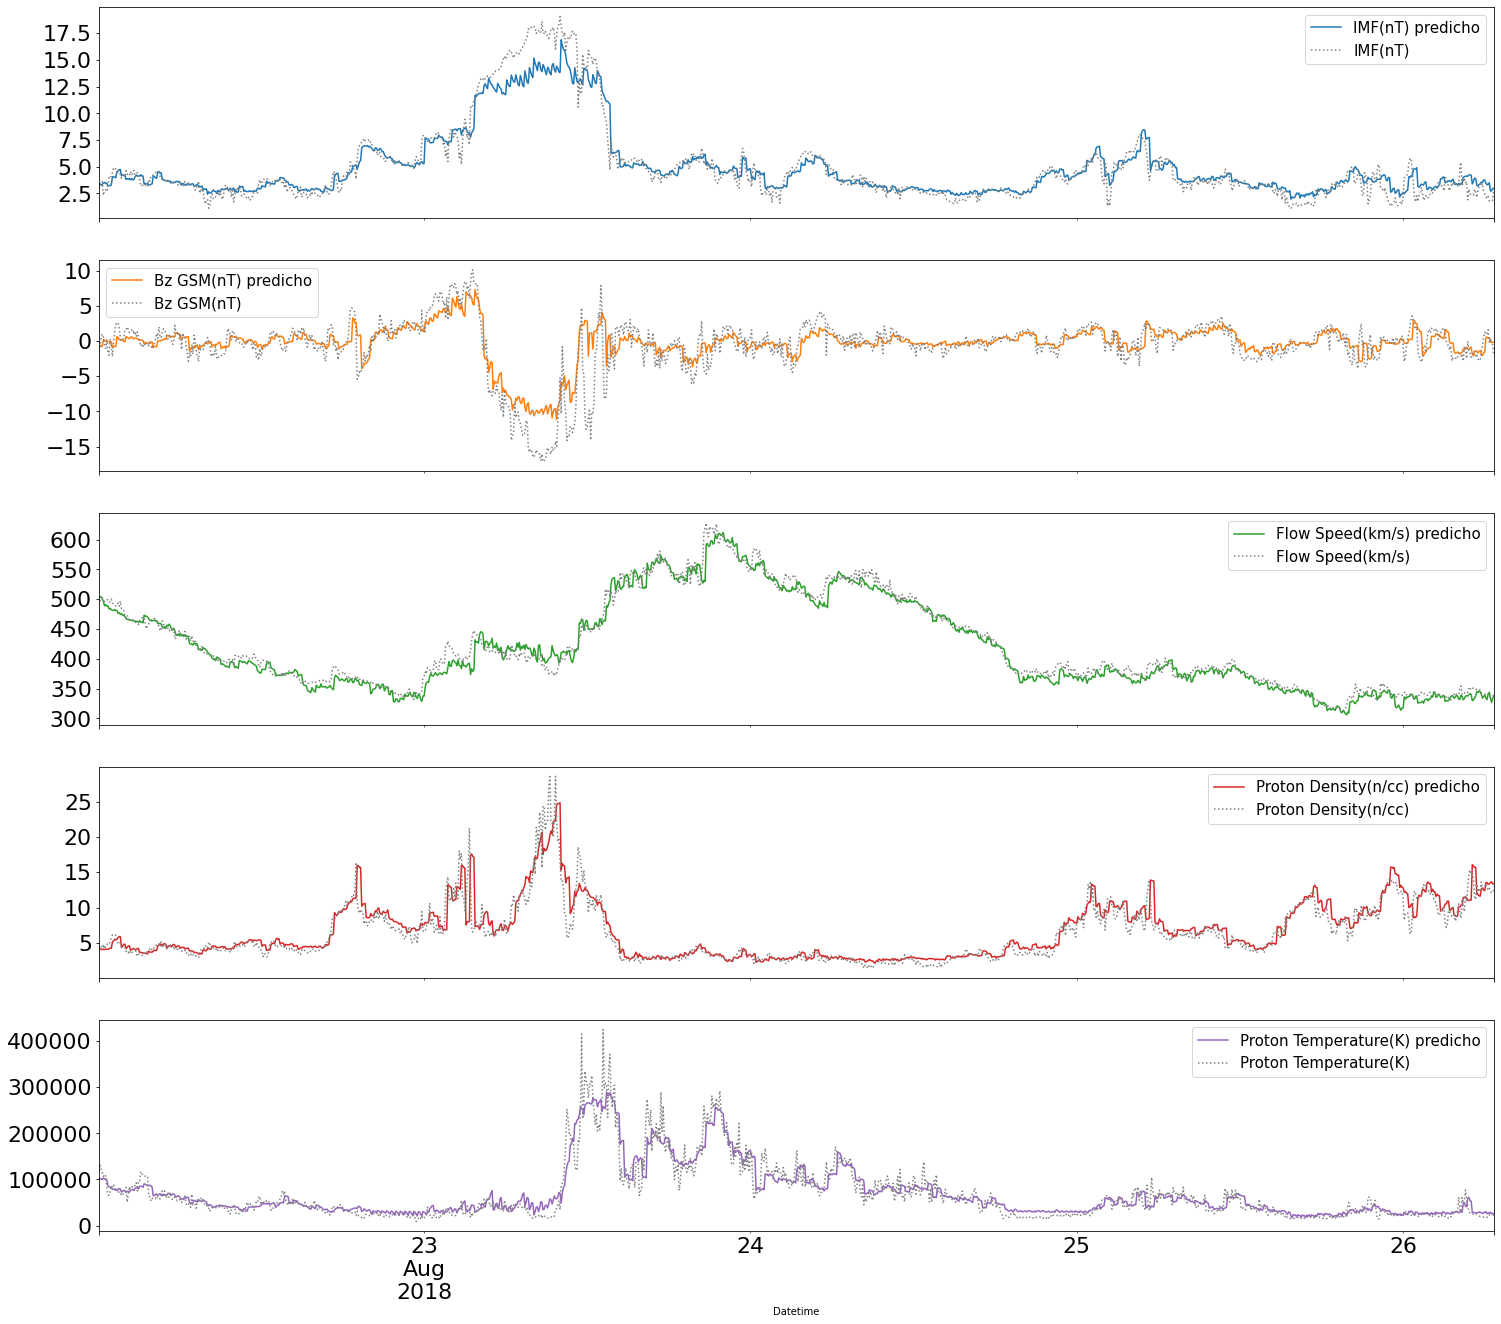

In [36]:
#Aunque el datetime este mal, las graficas son a 15 minutos para exactamente la misma tormenta que mas adelante (no hemos cambiado para que incremente de 15 en 15 el datetime)
plt.rcParams.update({'legend.fontsize': 15})
ax = df_predicciones.plot(subplots = True, figsize=(25, 25), markersize = 20)
df_tormenta_observado.plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = 'grey', sharex = False,
                      fontsize=22, markersize = 20)

ValueError: ignored

In [ ]:
df_tormenta.shape[0]

864

In [ ]:
df_tormenta = df.loc['201808250340':'201808272359']


In [ ]:
df_tormenta.shape[0], len(x_test)

(820, 820)

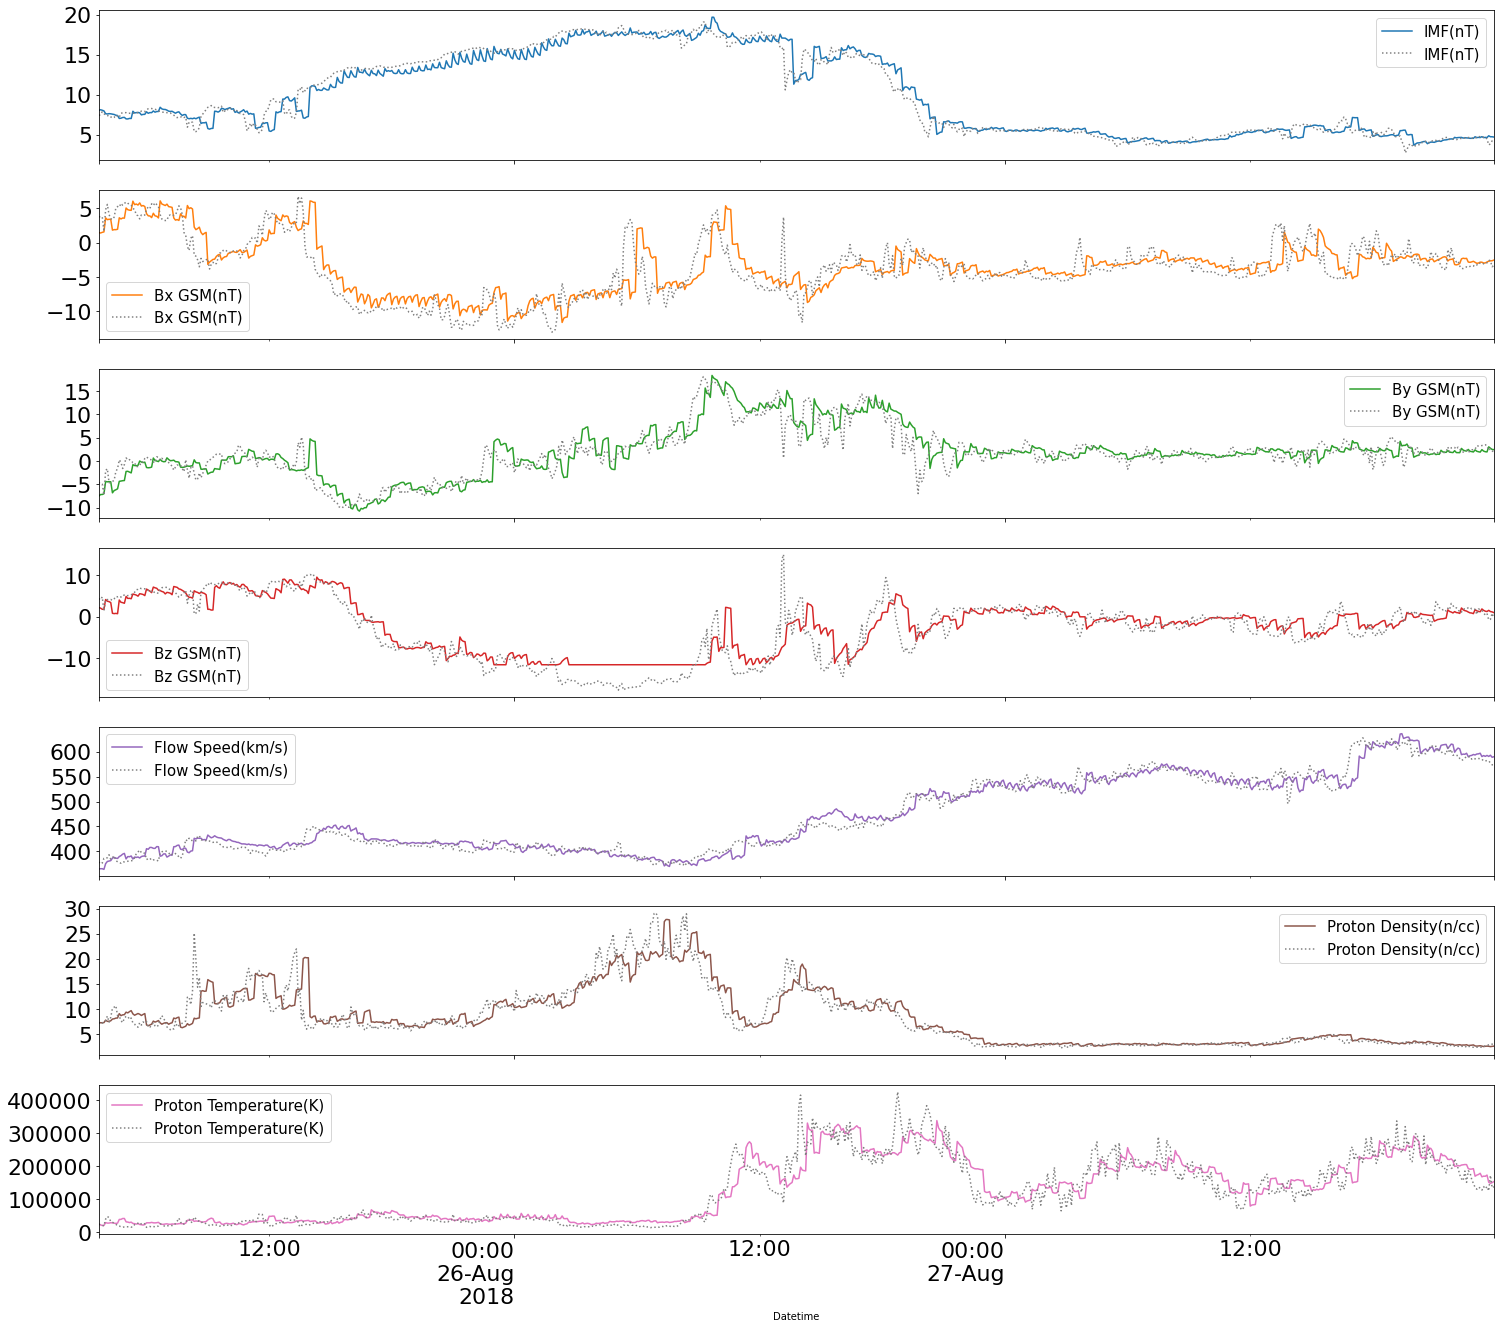

In [ ]:
prediccions_variables = obtener_predicciones_variables(predicciones_tormenta_c, variables)
obtener_df_predicciones(prediccions_variables, df_tormenta)